### Критика классического A/B-тестирования

В основе валидности классического A/B-тестирования лежит фундаментальное условие – **Stable Unit Treatment Value Assumption (SUTVA)**. SUTVA гласит, что измененные условия эксперимента воздействуют исключительно на ту группу, к которой они были применены, и не оказывают влияния, прямого или косвенного, на пользователей или сущности в других группах. Иными словами, исход одной экспериментальной единицы $Y_i$ должен быть статистически независим от исхода любой другой единицы $Y_j$, то есть $Y_i \perp Y_j$. Нарушение этого условия, известное как **сетевой эффект** или **интерференция**, приводит к искажению результатов и невалидным выводам.

Для формального доказательства рассмотрим оценку эффекта с помощью **атомов Хорвитца-Томпсона (HT)**, которая обеспечивает несмещенность даже при неравновероятных назначениях.

Атом HT для единицы $i$ определяется как:

$$
1_i := \left( \frac{Z_i}{q_i} - \frac{1 - Z_i}{1 - q_i} \right) Y_i
$$

где:
-  $Z_i$  — индикатор назначения;
-  $q_i := \Pr(Z_i = 1)$ — вероятность назначения единицы $i$ в тестовую группу;
- $Y_i := Z_i \, Y_i(1) + (1 - Z_i) \, Y_i(0)$  — наблюдаемый исход единицы $i$.

Мы стремимся понять, когда ковариация между двумя атомами $\operatorname{Cov}(1_t,1_{t'})$ становится ненулевой, поскольку именно эта ненулевая ковариация **раздувает дисперсию оценки**.

Для начала осознаем, что $\operatorname{Cov}(1_t,1_{t'})=\mathbb{E}[1_t1_{t'}] - \mathbb{E}[1_t]\mathbb{E}[1_{t'}] =\mathbb{E}[1_t1_{t'}]$

1. Атом строится так, что он добавляет $+Y_t(1)$ с некоторым весом, если единица попала в лечение, и $‑Y_t(0)$ с соответствующим весом, если она осталась в контроле. Вес подбирается «симметрично» ($\frac{1}{q_t}$ против $\frac{1}{(1-q_t)}$ ), поэтому то, что в среднем добавляется в «плюс», ровно компенсируется тем, что в среднем добавляется в «минус».
2. Потенциальные исходы $Y_t(1)$, $+Y_t(0)$ считаются фиксированными (никакой случайности); вся случайность — только в броске монетки $Z_t$. Поэтому, «переваривая» атом ожиданием по $Z_t$, мы усредняем именно эти симметричные веса, и они взаимно уничтожаются. В результате средний вклад одной единицы к оценке оказывается нулевым ⇒ $\mathbb{E}[1_t] = 0$
3. Раз $\mathbb{E}[1_t] = 0$ ⇒ $\operatorname{Cov}(1_t,1_{t'})=\mathbb{E}[1_t1_{t'}] - \mathbb{E}[1_t]\mathbb{E}[1_{t'}] =\mathbb{E}[1_t1_{t'}]$

Далее раскроем произведение двух атомов $1_t 1_{t'}$:

$$
\begin{aligned}
1_t 1_{t'} &=
\frac{Z_tZ_{t'}}{q_tq_{t'}}\,Y_t(1)Y_{t'}(1)
-\frac{Z_t(1-Z_{t'})}{q_t(1-q_{t'})}\,Y_t(1)Y_{t'}(0)\\[4pt]
&\quad-\frac{(1-Z_t)Z_{t'}}{(1-q_t)q_{t'}}\,Y_t(0)Y_{t'}(1)
+\frac{(1-Z_t)(1-Z_{t'})}{(1-q_t)(1-q_{t'})}\,Y_t(0)Y_{t'}(0).
\quad
\end{aligned}
$$

Чтобы с ним удобнее работать, введём дополнительные обозначения. Пусть каждая единица участвует в одном или нескольких независимых ключах (юнитах) рандомизации. Обозначим через $\mathcal U_t$ — множество ключей для объекта $t$, а через $\mathcal U_{t'}$ — аналогичное множество для $t'$.  Для каждого ключа $u$ соответствует вероятность теста попадания в тестовую группу $q_u$
Тогда число общих ключей:  

$$
J := |\mathcal U_t \cap \mathcal U_{t'}|
$$

Далее рассмотрим два случая:

* **Случай 1: $J=0$ (нет пересечения ключей)**

  При $J=0$ переменные $Z_t$ и $Z_{t'}$ независимы, ⇒

$$
\mathbb{E}[Z_t Z_{t'}] = q_t q_{t'}, \quad
\mathbb{E}[Z_t (1 - Z_{t'})] = q_t (1 - q_{t'}), \quad \text{и т.д.}
$$

$\qquad$  Подставляя эти значения в произведение $1_t 1_{t'}$, слагаемые взаимно уничтожаются и в итоге получается

$$
\mathbb{E}[1_t 1_{t'}] = 0 \quad \Longrightarrow \quad \operatorname{Cov}(1_t, 1_{t'}) = 0.
$$


* **Случай 2: $J \ge 1$ (есть хотя бы один общий ключ)**

  Пусть общие ключи имеют индексы $u_1, \dots, u_J$ и вероятности попадания в тест $q_{u_1}, \dots, q_{u_J}$.  
  Тогда в каждом слагаемом произведения $1_t 1_{t'}$, общий ключ встречается дважды в знаменателе и один раз в числителе. Например,

$$
  \mathbb{E}\left[\frac{Z_t Z_{t'}}{q_{u_1} q_{u_2} \dots q_{u_J}}\right] = \prod_{j=1}^J \frac{1}{q_{u_j}},
$$

$$
 \mathbb{E}\left[\frac{(1 - Z_t)(1 - Z_{t'})}{(1 - q_{u_1})(1 - q_{u_2}) \dots (1 - q_{u_J})}\right] = \prod_{j=1}^J \frac{1}{1 - q_{u_j}}.
$$

$\qquad$  Собирая четыре слагаемых, получаем

$$
\begin{aligned}
\mathbb{E}[1_t 1_{t'}] &= \left( \prod_{j=1}^J \frac{1}{q_{u_j}} - 1 \right) Y_t(1) Y_{t'}(1) \\
&\quad + \left( \prod_{j=1}^J \frac{1}{1 - q_{u_j}} - 1 \right) Y_t(0) Y_{t'}(0) \\
&\quad + Y_t(1) Y_{t'}(0) + Y_t(0) Y_{t'}(1)
\end{aligned}
$$

$\qquad$ В общем случае, эта величина не равна нулю, потому что $\left( \prod_{j=1}^J \frac{1}{q_{u_j}} - 1 \right)$ и $\left( \prod_{j=1}^J \frac{1}{1 - q_{u_j}} - 1 \right)$ не равны нулю при наличии $\qquad$ общего ключа. Следовательно,

$$
\operatorname{Cov}(1_t, 1_{t'}) = \mathbb{E}[1_t 1_{t'}] \neq 0 \quad \text{при } J \ge 1
$$

* **Специальный случай: равное распределение**

  Если для всех общих ключей $q_{u_j} = 0.5$, то ковариация между атомами увеличивается экспоненциально:

$$
\mathbb{E}[1_t 1_{t'}] = (2^J - 1) \left[ Y_t(1) Y_{t'}(1) + Y_t(0) Y_{t'}(0) \right] + Y_t(1) Y_{t'}(0) + Y_t(0) Y_{t'}(1).
$$

**Итоговый вывод**

$\text{Наличие хотя бы одного общего ключа } J \ge 1 \text{ вызывает ненулевую ковариацию } \operatorname{Cov}(1_t, 1_{t'}) \neq 0.$  
Это и есть причина, почему в практике из-за сетевых связей дисперсия оценок может быть значительно выше, чем при независимых рандомизациях.

**Примеры искажений**

  *   **Модель взаимодействия водитель-пассажир в такси:**
        В логистических сервисах, таких как такси или доставка еды, водители (или курьеры) являются **общим ресурсом** для всех пассажиров (или клиентов) в определенной географической зоне.
        Рассмотрим пример, где Миша и Коля, живущие в соседних домах, заказывают такси утром примерно в одно время. Коля находится в контрольной группе (старый алгоритм ценообразования), а Миша — в тестовой (новый алгоритм, снизивший цену на 5%).
        Миша, видя более низкую цену, быстрее принимает решение о заказе, тем самым **"отнимая" водителя у Коли**. В результате Коля остается без машины, и ему, возможно, придется изменить цену для поездки или вообще отказаться от нее, поскольку свободных машин в округе больше нет.
        В этой ситуации **конверсия Коли занижена из-за Миши**, что означает, что измененные условия повлияли не только на решение Миши, но и на Колю. Это является прямым нарушением SUTVA, поскольку результат Коли (отмена или измененная цена) был загрязнен воздействием, примененным к Мише через **общий пул водителей**. Как следствие, средние задержки доставки для не-сюржевой группы могут быть **недооценены** из-за перелива эффекта от сюржевой группы, использующей тот же автопарк.

  *   **Эффект перераспределения спроса в динамическом ценообразовании:**
        В 2/3-сторонних маркетплейсах, таких как Uber, Lyft или DoorDash, динамическое ценообразование (например, surge pricing) используется для балансировки спроса и предложения.
        Если на тестовой территории вводится новая система ценообразования (например, повышенные тарифы для снижения спроса в часы пик), это может привести к **перераспределению спроса**. Клиенты, столкнувшись с повышенными ценами, могут принять решение либо **отказаться от поездки**, либо **переместиться в соседнюю зону**, где цены остались прежними.
        Этот "перелив" спроса означает, что контрольная группа, находящаяся в соседней зоне, **косвенно затронута экспериментом** в тестовой зоне. В результате, KPI (например, задержки доставки) для контрольной группы будут "загрязнены" эффектом перелива из тестовой группы. Это искажает истинную реакцию потребителей и приводит к **смещенной оценке эффективности** нового алгоритма. Аналогичные проблемы возникают при тестировании алгоритмов распределения заказов или систем стимулирования водителей.

**Последствия использования обычного A/B-тестирования в условиях сетевого эффекта**:

*   **Искажение и смещение результатов**:

Поскольку группы не являются по-настоящему независимыми, наблюдаемые различия между ними могут быть неверно приписаны тестовому воздействию. Это приводит к **некорректным оценкам причинно-следственных связей**. Фактический эффект может быть сильно переоценен или недооценен, что приведет к неоптимальным или даже вредным решениям о развертывании функций.
*   **Неверная оценка статистической значимости**:

Наличие ковариации между наблюдениями в разных группах приводит к **недооценке стандартных ошибок** и, как следствие, **переоценке статистической значимости**. Это означает, что вы можете объявить эффект "статистически значимым", когда на самом деле это произошло случайно, увеличивая риск **ошибки первого рода (False Positive Rate - FPR)**. FPR перестает контролироваться пороговым значением p-value, что делает выводы из теста ненадежными.
*   **Снижение мощности эксперимента**:

Хотя может показаться, что наличие большего количества "независимых" наблюдений полезно, в условиях сетевых эффектов это не так. При попытке агрегировать данные на уровне более крупных "юнитов" (например, гео-час), количество таких юнитов может быть недостаточным, что **снижает статистическую мощность теста**. В результате вы можете не обнаружить истинный эффект, даже если он присутствует (увеличивается риск ошибки второго рода), или вам потребуется значительно удлинять эксперимент, что может быть неэффективно или невозможно.
*   **Затруднение интерпретации и выводов**:

Когда сетевые эффекты присутствуют, становится крайне сложно однозначно интерпретировать результаты. Неясно, является ли наблюдаемый эффект прямым результатом изменения или косвенным следствием взаимодействия групп. Это затрудняет формулирование четких выводов и рекомендаций для бизнеса.

Таким образом, в сложных динамических средах классическое A/B-тестирование с его базовыми предпосылками оказывается несостоятельным, требуя применения более сложных методологий, таких как Switchback-тестирование, для получения валидных и неискаженных результатов.

### Концепция Switchback-Тестирования

**Switchback-тестирование** — это фреймворк для проведения экспериментов, который циклически чередует применения различных «трактовок» (тестовых или контрольных условий) во времени для оценки их эффективности. В отличие от традиционных A/B-тестов, где трафик делится на независимые группы пользователей одновременно, Switchback-тесты основаны на **рандомизации по временным слотам** и/или **географическим единицам** (кластерам).

Формально, в Switchback-эксперименте мы делим среду тестирования на **дискретные единицы**, которые затем случайным образом назначаются в контрольную или тестовую группу в определённые периоды времени. В контексте Switchback-тестирования, **единицей (Unit)** рандомизации является **комбинация географической зоны и определённого промежутка времени**. Например, это могут быть [гексагоны](https://www.uber.com/en-PL/blog/h3/) или определённый район города, к которому в конкретный час применяется либо контрольный, либо тестовый алгоритм.

Это означает, что вместо случайного назначения индивидуальных пользователей, заказов или водителей в группы (как в традиционном A/B-тестировании), мы назначаем целые **"локации-время"** (clusters-time slots). Например, для одного региона время разбивается на часовые приращения, и каждый такой "план-юнит" случайным образом назначается либо базовой, либо кандидатской группе.

Ниже представлена визуализации геохроносплитования из [статьи](https://habr.com/ru/companies/citymobil/articles/560426/) Ситимобила.

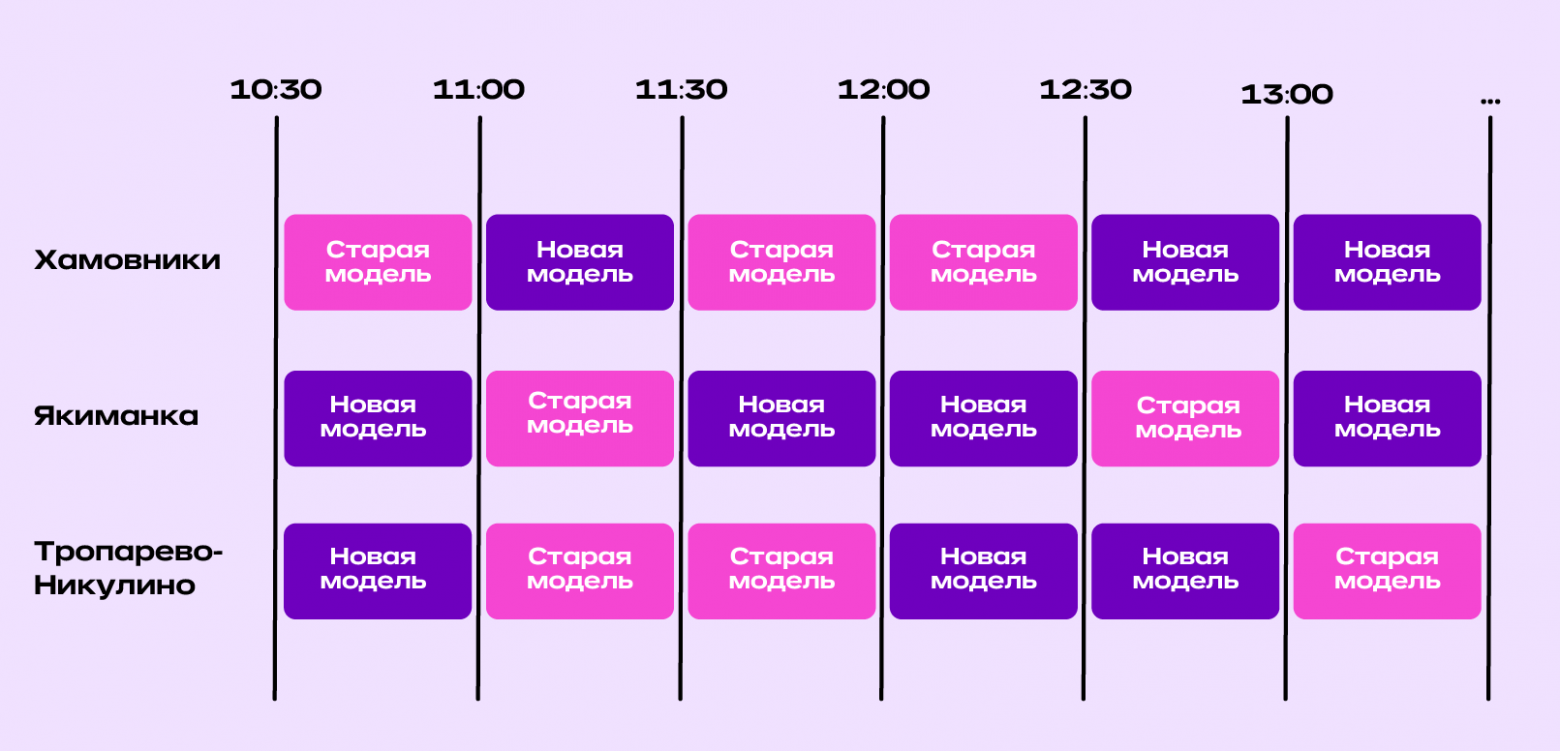

Ключевая проблема, с которой борются Switchback-тесты, — это **сетевые эффекты (Network Effects)**. В двухсторонних маркетплейсах (например, райдшеринг, доставка), где спрос и предложение тесно связаны через **общий ресурс** (например, парк водителей), SUTVA часто нарушается. Если водитель из тестовой группы, где цены ниже, быстрее принимает заказ, он **отнимает ресурс** (водителя) у контрольной группы, косвенно влияя на её показатели (например, увеличивая время ожидания или отмену заказа).

Switchback-тестирование борется с этим эффектом следующим образом:
1.  **Гео-хроно-сплитование:** Вместо деления по пользователям, весь **кластер (географическая зона)** в определённый **временной интервал** получает одно и то же воздействие (либо контроль, либо тест). Это значительно сокращает количество взаимодействий между пользователями, находящимися в разных группах.
2.  **Минимизация взаимодействия:** Цель состоит в том, чтобы каждый кластер был **максимально автономным и независимым** от других. Это можно измерить, например, долей заказов, где ресторан, клиент и курьер находятся в пределах одного кластера. Варьирование границ кластеров (часто вдоль естественных преград, таких как реки или крупные автомагистрали) помогает максимизировать эту автономию.
3.  **Перераспределение во времени:** Поскольку кластеры могут сильно отличаться друг от друга (например, по плотности заказов, погодным условиям), через фиксированные интервалы времени происходит **случайное переключение** группы для каждого кластера. Это позволяет каждому кластеру побывать в обеих группах (тестовой и контрольной) в разные моменты времени, усредняя влияние внешних факторов и повышая надёжность измерений. Таким образом, наблюдения становятся менее независимыми на уровне "кластер-период времени".

В результате, хотя сетевой эффект не устраняется полностью (особенно на границах кластеров или во время переключений), он значительно **сокращается**, что позволяет получать более **валидные и несмещённые оценки** эффектов.

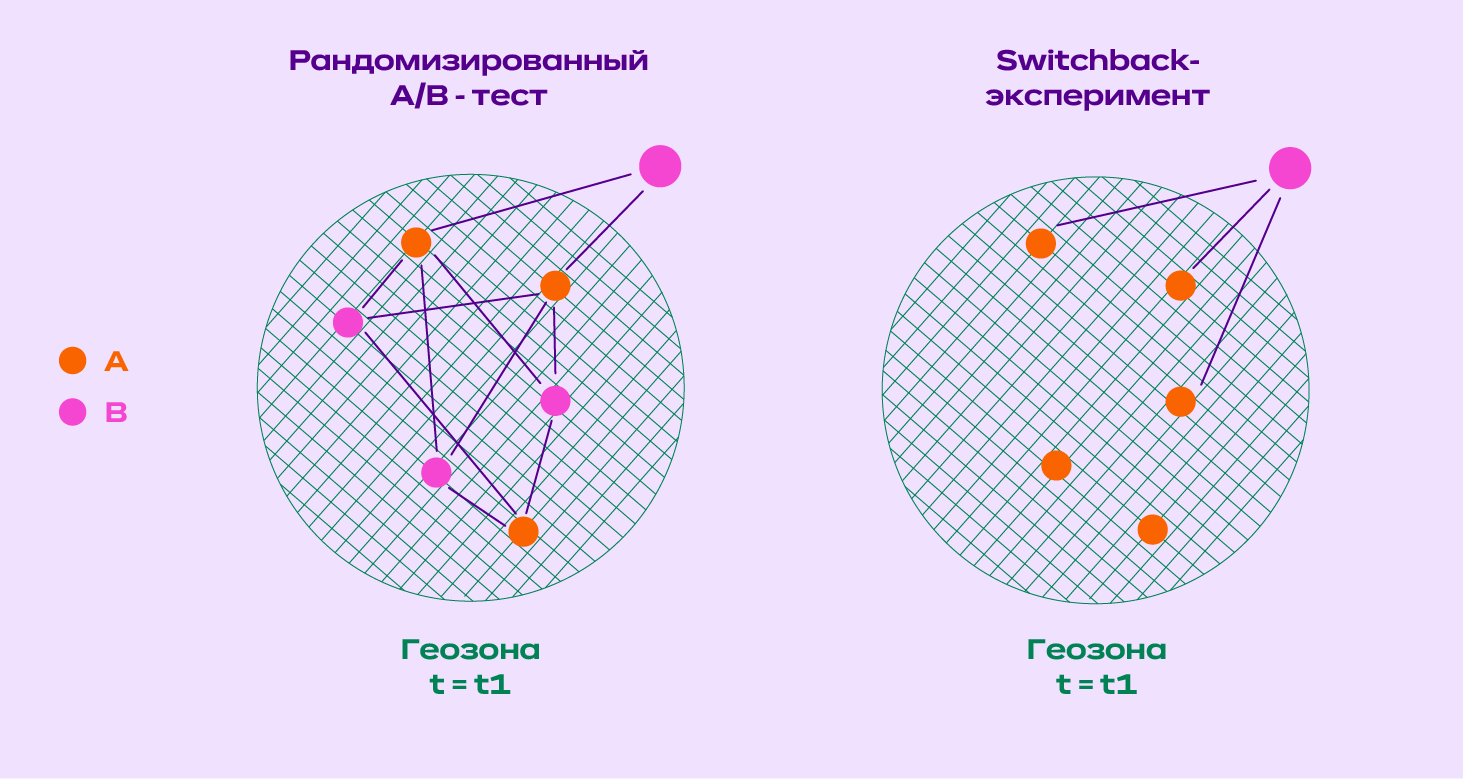

#### Эффективность теста
Эффективность Switchback-теста во многом зависит от грамотного выбора параметров кластеризации: временных окон и географических зон.

*   **Временные окна**

    Длительность временного окна — это период, в течение которого кластер непрерывно находится в одной группе (тестовой или контрольной) до следующего случайного переключения.

    Необходимо найти баланс между длительностью интервала и количеством наблюдений.
    *   **Слишком короткий интервал**
        *   Позволяет получить **много измерений** (больше юнитов), что потенциально **снижает дисперсию** метрик и повышает чувствительность теста.
        *   Однако увеличивает **риск "памяти" кластера или "переноса эффекта" (Carryover Effect)**: воздействие предыдущей трактовки может сохраняться и влиять на результаты в текущем периоде. Например, если среднее время доставки заказа составляет 45 минут, а интервал Switchback установлен на 10 минут, то большая часть данных по заказам будет затронута обеими группами, что сделает оценку эффекта затруднительной.
        *   Может привести к **смещённым данным (Bias)**, если алгоритмы, работающие в группах, не успевают стабилизироваться или "исправлять" ситуацию после быстрого переключения.
    *   **Слишком длинный интервал**
        *   **Уменьшает количество доступных наблюдений** (меньше юнитов), что **повышает дисперсию** и снижает статистическую мощность теста.
        *   Однако **снижает риск Carryover Effect**, поскольку даёт больше времени для стабилизации эффектов перед переключением.
    *   **Оптимальная длительность:**
        *   Единого "оптимального" ответа нет; она **зависит от вашей бизнес-системы и тестируемого алгоритма**.
        *   Рекомендуется отталкиваться от **средней длительности целевого действия** (например, среднее время доставки заказа) и брать окно **в несколько раз больше**.

*   **Географические зоны:**
    *   **Независимость кластеров**
    
    Главная цель — создание **автономных географических зон**, где взаимодействие с соседними кластерами минимально.
    *   **Естественные границы**
    
    Часто города делятся на такие кластеры естественными преградами, как реки, крупные автомагистрали, лесополосы, которые интуитивно снижают взаимодействие между зонами.
    *   **Размер кластера**
    
    Выбор оптимального размера также представляет из себя компромис. Так увеличение количества юнитов может уменьшить **[Margin of Error (предельную погрешность выборки)](https://en.wikipedia.org/wiki/Margin_of_error)**, делая доверительные интервалы уже и позволяя точнее оценивать среднее. Однако это увеличивает **[Bias (смещение)](https://en.wikipedia.org/wiki/Bias_of_an_estimator)**, так как выборка из меньших зон может быть менее репрезентативной. Маленькие юниты могут быть менее похожи друг на друга и содержать больше выбросов, что увеличивает дисперсию выборки.

### Методология Switchback

**Модель потенциальных исходов для кластеров**

В Switchback-эксперименте **экспериментальной единицей (или "юнитом")** становится не индивидуальный пользователь, а **кластер, определяемый комбинацией географической зоны и временного интервала**. В любой заданный момент времени все пользователи в одном кластере получают одинаковое воздействие (либо тестовое, либо контрольное).

Пусть $t \in \{1, \dots, T\}$ обозначает дискретные временные периоды, а $T$ — общую продолжительность эксперимента. Для каждого временного периода $t$ мы назначаем кластеру воздействие $W_t \in \{0, 1\}$, где $W_t = 1$ соответствует тестовому воздействию, а $W_t = 0$ — контрольному. **Путь назначений** представляет собой вектор $\mathbf{W}_{1:T} = (W_1, W_2, \dots, W_T) \in \{0,1\}^T$.

**Ключевой аспект Switchback-тестирования — эффект последействия (carryover effect)**. Это означает, что воздействие, примененное в предыдущие периоды, может продолжать влиять на результаты в текущем периоде. Мы делаем следующие предположения о потенциальных исходах $Y_t$:

*   **Предположение 1 (Non-anticipating Potential Outcomes):** Исходы в момент времени $t$ не зависят от будущих назначений.

  Формально, для любого $t \in [T]$, $\mathbf{w}_{1:t} \in \{0,1\}^t$, и для любых $\mathbf{w}'_{t+1:T}, \mathbf{w}''_{t+1:T} \in \{0,1\}^{T-t}$ $Y_t(\mathbf{w}_{1:t}, \mathbf{w}'_{t+1:T}) = Y_t(\mathbf{w}_{1:t}, \mathbf{w}''_{t+1:T})$

  Это условие выполняется, поскольку механизм назначения контролируется экспериментатором, и исход в момент $t$ не может зависеть от еще не произошедших назначений.

*   **Предположение 2 ($m$-Carryover Effects)**: Существует фиксированное $m$, такое что исход в момент времени $t$ зависит только от воздействий в течение последних $m+1$ периодов ($W_{t-m}, \dots, W_t$).

  Формально, для любого $t \in \{m+1, \dots, T\}$, $\mathbf{w}_{t-m:T} \in \{0,1\}^{T-t+m+1}$, и для любых $\mathbf{w}'_{1:t-m-1}, \mathbf{w}''_{1:t-m-1} \in \{0,1\}^{t-m-1}$ $Y_t(\mathbf{w}'_{1:t-m-1}, \mathbf{w}_{t-m:T}) = Y_t(\mathbf{w}''_{1:t-m-1}, \mathbf{w}_{t-m:T})$
   
  Это позволяет нам упростить обозначение потенциального исхода до $Y_t(W_{t-m:t})$. Значение $m$ (порядок эффекта последействия) определяется экспертным знанием предметной области, например, эффект динамического ценообразования в райдшеринге обычно рассеивается через 1-2 часа.

*   **Предположение 3 (Bounded Potential Outcomes)**: Потенциальные исходы ограничены некоторой константой $B > 0$. Это техническое предположение, необходимое для оптимизации дизайна и обеспечения корректности статистических выводов.

**Оценка среднего эффекта лечения**

Наша цель — оценить средний эффект от постоянно применяемой новой политики (тестового воздействия) по сравнению с постоянной контрольной политикой. Мы фокусируемся на **среднем причинном эффекте с лагом $p$ (average lag-p causal effect)**, определяемом как:
$$\tau_p(Y) = \frac{1}{T-p} \sum_{t=p+1}^T [Y_t(\mathbf{1}_{p+1}) - Y_t(\mathbf{0}_{p+1})]$$
где $\mathbf{1}_{p+1}$ — вектор из $p+1$ единиц (постоянное тестовое воздействие), а $\mathbf{0}_{p+1}$ — вектор из $p+1$ нулей (постоянное контрольное воздействие). Здесь $p$ представляет собой наше знание или предположение о порядке эффекта последействия $m$.

Мы наблюдаем только один реализованный путь назначений $\mathbf{w}_{1:T}^{\text{obs}}$ и соответствующие наблюдаемые исходы $Y_t^{\text{obs}} = Y_t(\mathbf{w}_{1:T}^{\text{obs}})$. Для оценки $\tau_p(Y)$ мы используем **оценку Хорвица-Томпсона (Horvitz-Thompson estimator, HT-оценка)**, которая "перевзвешивает" каждое наблюдение обратной вероятностью его назначения, чтобы учесть потенциальные неравные вероятности выборки.

В контексте Switchback-экспериментов, для каждого периода $t$, мы определяем вклад в оценку ATE следующим образом, учитывая наблюдаемые исходы $Y_t^{\text{obs}}$ и вероятности пути назначения $\mathbf{w}_{t-p:t}$:
$$\hat{\tau}_p(\eta_{T,Q}, \mathbf{w}_{1:T}, Y) = \frac{1}{T-p} \sum_{t=p+1}^T \left\{ \frac{Y_t^{\text{obs}} \mathbf{1}_{\mathbf{w}_{t-p:t} = \mathbf{1}_{p+1}}}{\Pr(\mathbf{W}_{t-p:t} = \mathbf{1}_{p+1})} - \frac{Y_t^{\text{obs}} \mathbf{1}_{\mathbf{w}_{t-p:t} = \mathbf{0}_{p+1}}}{\Pr(\mathbf{W}_{t-p:t} = \mathbf{0}_{p+1})} \right\}$$
где $\eta_{T,Q}$ — вероятностное распределение пути назначений, определяемое дизайном эксперимента.

**Мощность теста**

В Switchback-экспериментах **мощность** теста зависит от нескольких факторов:

*   **Длительность эксперимента ($T$) и порядок carryover effect ($m$)**: Отношение $T/m$ (общее количество эффективных периодов) напрямую влияет на мощность. Чем больше это отношение, тем выше мощность. Фирмы могут выбирать $T$, ориентируясь на кривую мощности, чтобы достичь желаемого уровня обнаружения эффекта.
*   **Соотношение сигнал/шум**: Чем сильнее эффект воздействия (сигнал) по сравнению с шумом в данных, тем выше мощность. Большие значения параметра $\delta$ (отвечающего за эффект воздействия) приводят к более высоким показателям мощности при той же длительности эксперимента.
*   **Размер выборки (количество юнитов)**: Увеличение количества наблюдений (юнитов) обычно приводит к снижению дисперсии оценки и повышению мощности. Однако, в Switchback-экспериментах количество юнитов ограничено делением по времени и геозонам.
*   **Точность оценки $m$**: Если порядок carryover effect $m$ недооценен, оценка будет смещенной, что может повлиять на мощность. Если $m$ переоценен, оценка остается несмещенной, но дисперсия может быть больше, чем при точном $m$, что также снижает мощность.

**Для оценки применимости и мощности статистических тестов, крайне важны A/A-тесты.** Проводя множество синтетических A/A-тестов на исторических данных (где нет реального эффекта), мы можем получить **распределение p-value**. Если выбранный статистический тест применим, это распределение должно быть **равномерным**. Отклонение от равномерности указывает на то, что **FPR (false positive rate - вероятность ложноположительного результата) НЕ контролируется пороговым значением p-value**, и выводы теста будут невалидными. После подтверждения валидности, A/A-тесты используются для оценки FPR (вероятности ложноположительного результата) и Sensitivity (мощности).

**Построение доверительных интервалов**

Стандартные $t$-тесты, используемые для классических A/B-тестов, **не рекомендуются для Switchback-экспериментов**, поскольку они нарушают требование о независимости наблюдений на пользовательском или сессионном уровне из-за сетевых эффектов. Даже если агрегировать данные до уровня "юнита" (кластер+время), это может привести к **недостаточной мощности (underpowered) тестов** из-за сокращения количества наблюдений, а также к **неравнозначности юнитов** (например, ночные против дневных).

Для построения доверительных интервалов и проверки гипотез используются более сложные статистические подходы:

*   **Точный рандомизационный тест (Exact Inference)**: Этот непараметрический тест проверяет гипотезу отсутствия эффекта (sharp null hypothesis) для каждой точки времени. Алгоритм симулирует новые пути назначений, предполагая, что наблюдаемые исходы остаются неизменными при гипотезе отсутствия эффекта. Он позволяет получить точные p-значения.

*   **Асимптотический вывод (Asymptotic Inference)**: Для проверки гипотезы об отсутствии среднего эффекта используется центральная предельная теорема для конечных популяций. При достаточной длительности эксперимента ($T$, чем больше отношение $T/m$, тем лучше) распределение HT-оценки **асимптотически сходится к нормальному распределению**:
  $$\frac{\hat{\tau}_m - \tau_m}{\sqrt{\text{Var}(\hat{\tau}_m)}} \xrightarrow{D} N(0,1)
  $$
  
  где $\text{Var}(\hat{\tau}_m)$ — дисперсия HT-оценки.

  В switchback-экспериментах часто используется оценка Хорвица-Томпсона $\widehat{\tau}_m$ , которая является несмещенной оценкой среднего эффекта воздействия $\tau_{m}$
  
  Используя асимптотическую нормальность оценки и заменяя истинную дисперсию её оценкой $\widehat{\sigma}^2_U$, можно построить $100(1-\alpha)\%$ доверительный интервал для $\tau_m$:

$$
\text{CI}_{100(1-\alpha)\%} = \left[ \widehat{\tau}_m - z_{\alpha/2} \sqrt{\widehat{\sigma}^2_U} \text{ ; } \widehat{\tau}_m + z_{\alpha/2} \sqrt{\widehat{\sigma}^2_U} \right]
$$
  

Есть 2 подхода, как можно подсчитать дисперсию дял асимптотического вывода:

  1. **Теоретическая формула дисперсии оценки $\text{Var}(\widehat{\tau}_m)$**:

  Для оптимального дизайна switchback-эксперимента, когда общая длительность эксперимента $T$ делится на длину периода перенесенного эффекта $m$, $n = T/m$, где $n \geq 4$ является целым числом, дисперсия оценки $\widehat{\tau}_m$ может быть выражена формулой:

$$
\text{Var}(\widehat{\tau}_m) = \frac{1}{(T-m)^2}
\left\{
\bar{Y}_0(1_{m+1})^2 + \bar{Y}_0(0_{m+1})^2 + 2\bar{Y}_0(1_{m+1})\bar{Y}_0(0_{m+1}) \right. \\
\left. + \sum_{k=1}^{n-3} \left[ 3\bar{Y}_k(1_{m+1})^2 + 3\bar{Y}_k(0_{m+1})^2 + 2\bar{Y}_k(1_{m+1})\bar{Y}_k(0_{m+1}) \right] \right. \\
\left. + \bar{Y}_{n-2}(1_{m+1})^2 + \bar{Y}_{n-2}(0_{m+1})^2 + 2\bar{Y}_{n-2}(1_{m+1})\bar{Y}_{n-2}(0_{m+1}) \right. \\
\left. + \sum_{k=0}^{n-3} 2 \left[ \bar{Y}_k(1_{m+1}) + \bar{Y}_k(0_{m+1}) \right] \cdot \left[ \bar{Y}_{k+1}(1_{m+1}) + \bar{Y}_{k+1}(0_{m+1}) \right]
\right\}
$$

  * $T$ — общая длительность эксперимента (количество временных периодов).
  * $m$ — порядок (длительность) перенесенного эффекта (carryover effect), то есть время, в течение которого предыдущее воздействие продолжает влиять на результат.
  * $n = T/m$ — количество "эпох" или блоков экспериментов.
  * $\bar{Y}_k(1_{m+1})$ — сумма потенциальных результатов, которые были бы получены при последовательном применении эффекта (treatment) в течение $m+1$ периодов в $k$-й эпохе.
  * $\bar{Y}_k(0_{m+1})$ — сумма потенциальных результатов, которые были бы получены при последовательном применении контроля в течение $m+1$ периодов в $k$-й эпохе.


  2. **Практическая оценка дисперсии (несмещенная оценка верхней границы)**:
Для реальных данных используется **несмещенная оценка консервативной верхней границы дисперсии $\text{Var}(\widehat{\tau}_m)$**, обозначаемая как $\widehat{\sigma}^2_U$:

$$
\widehat{\sigma}^2_U = \frac{1}{(T-m)^2} \left\{
8(\bar{Y}_{obs,0})^2 + \sum_{k=1}^{n-3} 32(\bar{Y}_{obs,k})^2 1_{\{W_{km+1}=W_{(k+1)m+1}\}} + 8(\bar{Y}_{obs,n-2})^2
\right\}
$$

$\quad$ где:
  *   $\bar{Y}_{obs,k} = \sum_{t=(k+1)m+1}^{(k+2)m} Y_{obs,t}$ — сумма **наблюдаемых результатов** в $k$-й эпохе (блоке). Например, $\bar{Y}_{obs,0}$ — это сумма наблюдаемых результатов с периода $m+1$ по $2m$.
  *   $1_{\{W_{km+1}=W_{(k+1)m+1}\}}$ — индикаторная функция, которая равна 1, если назначение воздействия $W$ в начале эпохи $km+1$ было таким же, как и в начале эпохи $(k+1)m+1$, и 0 в противном случае. Это означает, что для среднего члена суммы учитываются только те блоки, где назначение воздействия между смежными точками рандомизации было одинаковым.

   **Комментарий**: Эта оценка $\widehat{\sigma}^2_U$ является несмещенной оценкой верхней границы истинной дисперсии, то есть $E[\widehat{\sigma}^2_U] = \text{Var}_U(\widehat{\tau}_m)$. Её использование позволяет проводить **консервативную оценку статистической значимости**. Оптимальный дизайн switchback-экспериментов предполагает равную вероятность (50/50) назначения лечения или контроля ($q_k = 1/2$), что позволяет избежать проблем со стабильностью оценки Хорвица-Томпсона, которые могут возникнуть, если вероятности близки к 0 или 1.

**Практические рекомендации по выбору размера кластеров и интервала переключения**:

1.  **Длительность интервала переключения (Switchback Window Size)**:
    *   Должен быть **достаточно долгим, чтобы полностью захватить измеряемый эффект**, но **достаточно коротким, чтобы обеспечить достаточное количество выборок** (юнитов) для статистической надежности.
    *   Если интервал слишком короткий, может проявиться **эффект последействия (carryover effect)**, когда влияние предыдущего воздействия сохраняется в следующем периоде, загрязняя данные. Например, если среднее время доставки составляет 45 минут, а период переключения — 10 минут, то почти все данные будут находиться в "периоде перелива" (spillover period), что затруднит интерпретацию.

2.  **Географическая зона (Cluster Size)**:
    *   **Кластеры должны быть максимально автономными**, чтобы минимизировать сетевой эффект между ними. Этого можно достичь, максимизируя долю заказов, когда ресторан, клиент и курьер находятся в одном кластере. Естественные границы (реки, магистрали) часто формируют такие кластеры.
    *   Рандомизация должна проводиться **по времени суток, дням недели и географическим зонам/регионам**. Это обеспечивает лучшее семплирование тестовой и контрольной групп в разное время и увеличивает общее количество данных, что снижает дисперсию.

3.  **"Сжигание" периодов (Burn-in and Burn-out Periods)**:
    *   Для дальнейшего снижения **перекрестного загрязнения (cross-contamination)** между группами, особенно на границах переключения, рекомендуется исключать из анализа данные, собранные в течение коротких "периодов сжигания" в начале и конце каждого интервала воздействия. Например, при часовом окне переключения с 5-минутными периодами сжигания, для анализа используются только данные из средних 50 минут. Это помогает избежать ситуаций, когда пользователь "попадает" под оба воздействия в одной сессии.

4.  **A/A-тестирование**:
    *   Необходимо провести A/A-тесты перед запуском A/B-теста, чтобы проверить **корректность работы платформы и равномерность разбиения на группы**. Это особенно важно, так как города и районы могут быть неравномерны по объему спроса и предложения.
    *   A/A-тесты также используются для **определения чувствительности тестов** и выбора подходящего интервала переключения.

**Оптимальный дизайн Switchback-эксперимента**

При $m > 0$ и общей длительности эксперимента $T = n\times m$ (где $n \ge 4$ — целое число), оптимальные точки рандомизации $T^*$ будут $\{1, 2m+1, 3m+1, \dots, (n-2)m+1\}$. Это означает, что рандомизация должна происходить **раз в $m$ периодов**, за исключением начального и конечного интервалов. Физическая длительность carryover effect определяет частоту оптимальной рандомизации. Длительность каждого периода должна быть **меньше длительности carryover effect**.

### Реализация Switchback

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pprint import pprint

class SwitchbackDesign:
    # ------------------------------------------------------------------ #
    # 1. Инициализация и план рандомизации                               #
    # ------------------------------------------------------------------ #
    def __init__(self, clusters, time_intervals,
                 carryover_effect_duration,
                 p_assign=.5, seed=None):
        self.clusters = clusters
        self.time_intervals = time_intervals
        self.carryover_effect_duration = carryover_effect_duration
        self.p_assign = p_assign
        self.rng = np.random.default_rng(seed)
        self.assignment_plan = self._generate_initial_assignment_plan()
        self.data = pd.DataFrame()

    def _generate_initial_assignment_plan(self):
        plan = {}
        for cl in self.clusters:
            plan[cl] = {}
            for t in self.time_intervals:
                plan[cl][t] = self.rng.choice(['control', 'test'],
                                              p=[1 - self.p_assign,
                                                 self.p_assign])
        return plan

    def cluster_assignment(self, current_time_interval, current_cluster_id):
        return self.assignment_plan[current_cluster_id][current_time_interval]

    # ------------------------------------------------------------------ #
    # 2. Симуляция анных                                                 #
    # ------------------------------------------------------------------ #
    def simulate_data(self,
                      num_users_per_interval_per_cluster=100,
                      baseline_mean=0.0,
                      baseline_std=1.0,
                      treatment_effect=0.2,
                      network_effect_from_previous_test=0.05,
                      network_effect_from_previous_control=-0.03):
        """
        Создаём континуальную метрику ~ Normal(μ, σ²).
        """
        records = []
        for cluster_id in self.clusters:
            previous_treat = None
            for t_int in self.time_intervals:
                cur_treat = self.cluster_assignment(t_int, cluster_id)

                is_burn = (previous_treat is not None
                           and previous_treat != cur_treat
                           and self.carryover_effect_duration > 0)

                mu = (baseline_mean +
                      (treatment_effect if cur_treat == 'test' else 0) +
                      (network_effect_from_previous_test
                       if is_burn and previous_treat == 'test' else 0) +
                      (network_effect_from_previous_control
                       if is_burn and previous_treat == 'control' else 0))

                # --- наблюдения ----------------------------------------- #
                metric_values = self.rng.normal(loc=mu, scale=baseline_std,
                                                size=num_users_per_interval_per_cluster)

                for val in metric_values:
                    records.append({
                        'cluster_id': cluster_id,
                        'time_interval': t_int,
                        'treatment_group': cur_treat,
                        'is_burn_in_burn_out': is_burn,
                        'user_success_metric': val
                    })
                previous_treat = cur_treat

        self.data = pd.DataFrame(records)
        print(f"Сгенерировано {len(self.data)} записей (Normal metric).")

    # ------------------------------------------------------------------ #
    # 3.  Кластер-робастная дисперсия + CI                               #
    # ------------------------------------------------------------------ #

    def _cluster_robust_var(self, unit_df, value_col='ht_atom', cluster_col='cluster_id'):
        n = len(unit_df)
        g_mean = unit_df.groupby(cluster_col)[value_col].mean()
        var_hat = g_mean.pow(2).sum() / n ** 2
        G = g_mean.size
        if G > 1:
            var_hat *= G / (G - 1)
        return var_hat

    @staticmethod
    def _ci(est, se, df, alpha=0.05):
        t_crit = stats.t.ppf(1 - alpha / 2, df)
        return est - t_crit * se, est + t_crit * se

    # ------------------------------------------------------------------ #
    # 4.  Оценка эффекта                                                 #
    # ------------------------------------------------------------------ #
    def estimate_effect(self, metric_col='user_success_metric',
                        method='mlm', remove_burn_in=True, alpha=0.05):
        if self.data.empty:
            raise RuntimeError("Нет данных — вызовите simulate_data()")

        df = (self.data[~self.data['is_burn_in_burn_out']]
              if remove_burn_in else self.data)

        if df.empty:
            print("Данные отсутствуют после фильтрации.")
            return {}

        if method == 'mlm':
            formula = f"{metric_col} ~ C(treatment_group)"
            lm = sm.OLS.from_formula(formula, data=df).fit()
            rob = lm.get_robustcov_results(cov_type='cluster',
                                           groups=df['cluster_id'])

            est = rob.params[1]          # коэффициент для treatment_group[test]
            se = rob.bse[1]
            p_value = rob.pvalues[1]

            df_dof = df['cluster_id'].nunique() - 1
            ci_low, ci_high = self._ci(est, se, df_dof, alpha)

            #print(rob.summary())
            return {"effect_estimate": est,
                    "std_err": se,
                    "ci_low": ci_low,
                    "ci_high": ci_high,
                    "p_value": p_value,
                    "method": method}

        elif method == 'horvitz_thompson':
            unit = (df.groupby(['cluster_id', 'time_interval',
                                'treatment_group'])
                      .agg(mean_metric=(metric_col, 'mean'))
                      .reset_index())
            unit['ht_atom'] = np.where(unit['treatment_group'] == 'test',
                                       unit['mean_metric'] / self.p_assign,
                                       -unit['mean_metric'] /(1 - self.p_assign))
            est = unit['ht_atom'].mean()
            var_hat = self._cluster_robust_var(unit)
            se = np.sqrt(var_hat)
            df_dof = unit['cluster_id'].nunique() - 1
            ci_low, ci_high = self._ci(est, se, df_dof, alpha)
            t_stat = est / se
            p_val = 2 * stats.t.sf(abs(t_stat), df_dof)

            return {"effect_estimate": est,
                    "std_err": se,
                    "ci_low": ci_low,
                    "ci_high": ci_high,
                    "p_value": p_val,
                    "method": method}

        else:
            raise ValueError("method ∈ {'mlm','horvitz_thompson'}")

    # ------------------------------------------------------------------ #
    # 5. Проверка гипотез                                                #
    # ------------------------------------------------------------------ #
    def run_hypothesis_test(self, metric_col='user_success_metric',
                            test_method='mlm', significance_level=0.05):
        res = self.estimate_effect(metric_col, test_method,
                                   alpha=significance_level)
        if not res:
            return False
        print(f"95% CI: [{res['ci_low']:.4f}; {res['ci_high']:.4f}]")
        if res['p_value'] < significance_level:
            print(f"Гипотеза отвергается (p={res['p_value']:.3f})")
            return True
        else:
            print(f"Гипотеза не отвергается (p={res['p_value']:.3f})")
            return False

    # ------------------------------------------------------------------ #
    # 6. Визуализации                                                    #
    # ------------------------------------------------------------------ #

    def plot_metric_dynamics(self, metric_col='user_success_metric'):
        if self.data.empty:
            raise RuntimeError("Нет данных для визуализации.")
        df = self.data[~self.data['is_burn_in_burn_out']]
        time_agg = (df.groupby(['time_interval', 'treatment_group'])
                      .agg(mean_metric=(metric_col, 'mean'))
                      .reset_index())
        plt.figure(figsize=(14, 6))
        sns.lineplot(x='time_interval', y='mean_metric',
                     hue='treatment_group', data=time_agg)
        for t in self.time_intervals:
            plt.axvline(x=t, color='grey', lw=.3, alpha=.2)
        plt.xlabel('Временной интервал')
        plt.ylabel(f'Среднее {metric_col}')
        plt.title('Динамика метрик во времени (Normal metric)')
        plt.show()

    def plot_assignment_schedule(self,
                                 time_col='time_interval',
                                 treat_col='treatment_group',
                                 burn_col='is_burn_in_burn_out'):
        if self.data.empty:
            raise RuntimeError("Нет данных для визуализации.")
        # агрегируем одну строку на интервал-кластер
        df = (self.data
              .groupby(['cluster_id', time_col])
              .agg(treat=(treat_col, 'first'),
                   burn=(burn_col, 'max'))
              .reset_index())

        def encode(row):
            if row.burn:
                return 0.5                         # burn-in / burn-out
            return 1 if row.treat == 'test' else 0  # test / control

        df['code'] = df.apply(encode, axis=1)
        pivot = df.pivot(index='cluster_id',
                         columns=time_col,
                         values='code')

        cmap = sns.color_palette(['#1f77b4', '#ff7f0e', '#bbbbbb'])
        plt.figure(figsize=(0.45 * pivot.shape[1] + 3,
                            0.35 * pivot.shape[0] + 2))
        sns.heatmap(pivot, cmap=cmap, cbar=False,
                    linewidths=.3, linecolor='white')
        plt.xlabel('Временной интервал')
        plt.ylabel('Кластер')
        plt.title('Расписание: контроль (синий), тест (оранжевый), burn-in (серый)')
        plt.tight_layout()
        plt.show()

    def plot_cluster_effect_bar(self, metric_col='user_success_metric',
                                treat_col='treatment_group',
                                burn_col='is_burn_in_burn_out'):
        if self.data.empty:
            raise RuntimeError("Нет данных для визуализации.")

        # Игнорируем burn-in/​burn-out (как и раньше)
        df = self.data[~self.data[burn_col]]

        agg = (df.groupby(['cluster_id', treat_col])
                 .agg(mean_metric=(metric_col, 'mean'))
                 .reset_index())

        plt.figure(figsize=(12, 6))
        sns.barplot(x='cluster_id', y='mean_metric', hue=treat_col,
                    data=agg, palette='Set2', width=.65)
        plt.xlabel('Кластер')
        plt.ylabel(f'Среднее {metric_col}')
        plt.title('Средние метрики по кластерам (bar chart)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [4]:
# параметры эксперимента
clusters       = range(20)
time_intervals = range(14)

exp = SwitchbackDesign(clusters=clusters,
                       time_intervals=time_intervals,
                       carryover_effect_duration=5,
                       seed=42)

exp.simulate_data(num_users_per_interval_per_cluster=10_000,
                  baseline_mean=1.0,
                  baseline_std=2.25,
                  treatment_effect=0.05,
                  network_effect_from_previous_test=0.1,
                  network_effect_from_previous_control=-0.2)

result = exp.estimate_effect(metric_col='user_success_metric',
                             method='mlm',
                             remove_burn_in=True,
                             alpha=0.05)


exp.run_hypothesis_test(metric_col='user_success_metric',
                            test_method='mlm', significance_level=0.05)

pprint(result)

Сгенерировано 2800000 записей (Normal metric).
95% CI: [0.0471; 0.0580]
Гипотеза отвергается (p=0.000)
{'ci_high': np.float64(0.057983803907152465),
 'ci_low': np.float64(0.04705040324733151),
 'effect_estimate': np.float64(0.052517103577241986),
 'method': 'mlm',
 'p_value': np.float64(2.889991123531093e-14),
 'std_err': np.float64(0.0026118669388422357)}


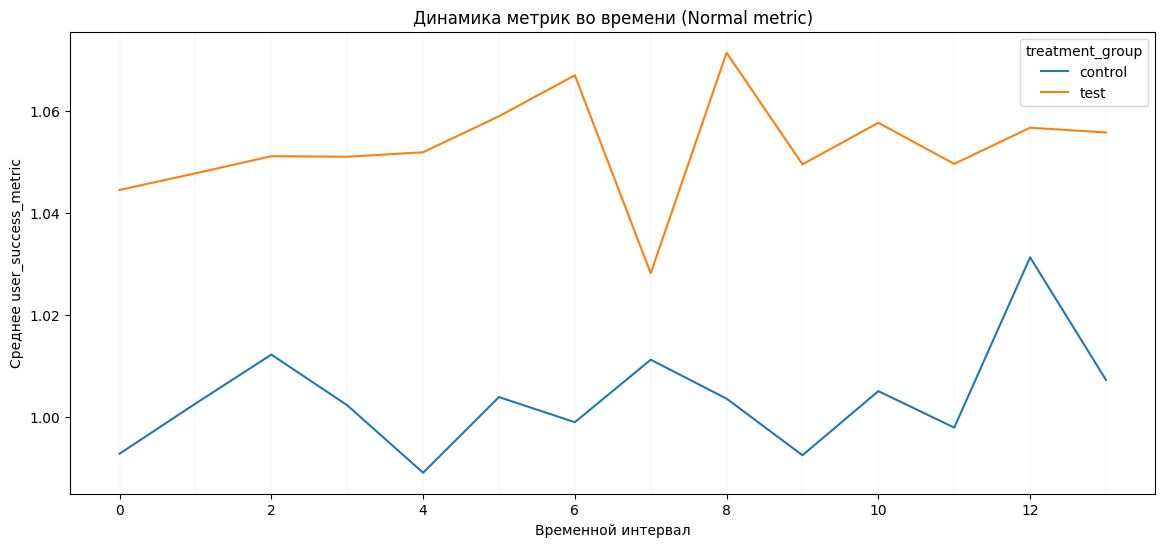

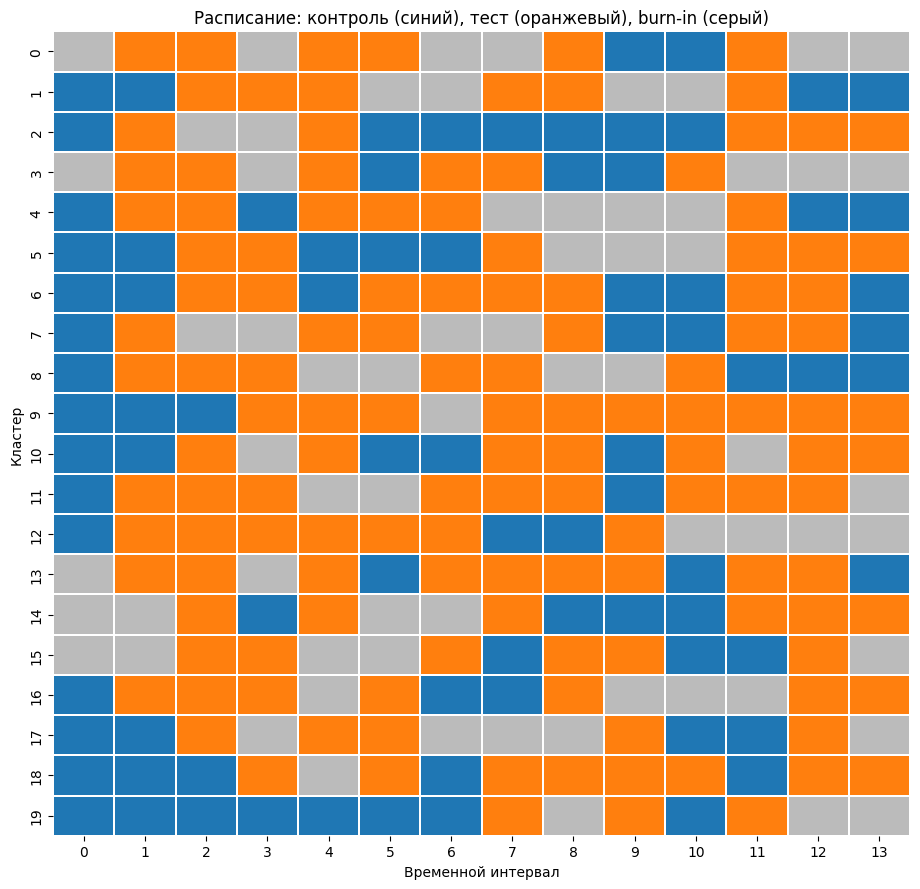

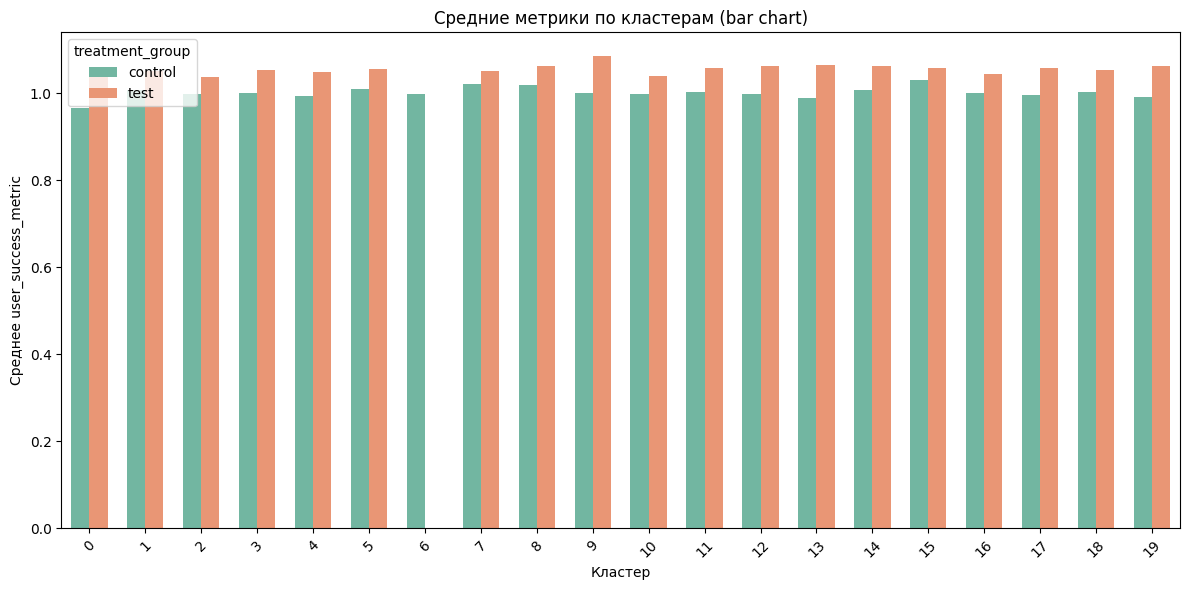

In [5]:
exp.plot_metric_dynamics()
exp.plot_assignment_schedule()
exp.plot_cluster_effect_bar('user_success_metric')